In [21]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis,skew

In [3]:
data = pd.read_excel('data.xlsx')
data.shape

(9551, 19)

In [4]:
df=data.copy()
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243


In [5]:
#uploading second data and merging primary data

sec = pd.read_excel('Country-Code.xlsx')
df=pd.merge(df,sec,on='Country Code',how='left')
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,Indonesia


Importing, Understanding, and Inspecting Data :

  -Perform preliminary data inspection and report the findings as the structure of the data, missing values, duplicates, etc.

  -Based on the findings from the previous questions, identify duplicates and remove them

In [6]:
df.columns = df.columns.str.replace(' ','_')
df.columns

Index(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Price_range', 'Aggregate_rating',
       'Rating_color', 'Rating_text', 'Votes', 'Country'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant_ID         9551 non-null   int64  
 1   Restaurant_Name       9550 non-null   object 
 2   Country_Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality_Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average_Cost_for_two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has_Table_booking     9551 non-null   object 
 13  Has_Online_delivery   9551 non-null   object 
 14  Price_range           9551 non-null   int64  
 15  Aggregate_rating     

In [8]:
#identifying null values
df.isna().sum()


Restaurant_ID           0
Restaurant_Name         1
Country_Code            0
City                    0
Address                 0
Locality                0
Locality_Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average_Cost_for_two    0
Currency                0
Has_Table_booking       0
Has_Online_delivery     0
Price_range             0
Aggregate_rating        0
Rating_color            0
Rating_text             0
Votes                   0
Country                 0
dtype: int64

In [10]:
df[df['Restaurant_Name'].isna()]

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
1646,113702,NaN,1,Ahmedabad,"Opposite Sindhu Bhawan, Bodakdev, Ahmedabad",Bodakdev,"Bodakdev, Ahmedabad",72.501764,23.040163,"North Indian, Continental, Mexican, Italian",800,Indian Rupees(Rs.),No,No,3,4.1,Green,Very Good,769,India


In [11]:
#dropping null value of restaurant name as there is onlyy 1 record, also reseting the index

df.dropna(axis=0,subset=['Restaurant_Name'],inplace=True)
df.reset_index(drop=True,inplace=True)

In [12]:
df[df['Restaurant_Name'].isna()]

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country


In [13]:
df[df['Cuisines'].isna()]

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
9082,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,NaN,40,Dollar($),No,No,3,3.9,Yellow,Good,209,United States
9085,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,NaN,40,Dollar($),No,No,3,3.8,Yellow,Good,102,United States
9093,17059060,Hillstone,216,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,NaN,40,Dollar($),No,No,3,4.4,Green,Very Good,1158,United States
9405,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,NaN,10,Dollar($),No,No,1,3.9,Yellow,Good,160,United States
9493,17142698,Leonard's Bakery,216,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,NaN,10,Dollar($),No,No,1,4.7,Dark Green,Excellent,707,United States
9503,17616465,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,NaN,10,Dollar($),No,No,1,3.9,Yellow,Good,309,United States
9532,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NaN,0,Dollar($),No,No,1,3.4,Orange,Average,34,United States
9534,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,NaN,0,Dollar($),No,No,1,3.4,Orange,Average,36,United States
9538,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NaN,0,Dollar($),No,No,1,3.4,Orange,Average,11,United States


In [14]:
#found 9 such Cuisines with no record ,so replacing them with others
df['Cuisines'].fillna('Others',inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9550 entries, 0 to 9549
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant_ID         9550 non-null   int64  
 1   Restaurant_Name       9550 non-null   object 
 2   Country_Code          9550 non-null   int64  
 3   City                  9550 non-null   object 
 4   Address               9550 non-null   object 
 5   Locality              9550 non-null   object 
 6   Locality_Verbose      9550 non-null   object 
 7   Longitude             9550 non-null   float64
 8   Latitude              9550 non-null   float64
 9   Cuisines              9550 non-null   object 
 10  Average_Cost_for_two  9550 non-null   int64  
 11  Currency              9550 non-null   object 
 12  Has_Table_booking     9550 non-null   object 
 13  Has_Online_delivery   9550 non-null   object 
 14  Price_range           9550 non-null   int64  
 15  Aggregate_rating     

In [16]:
df.isna().sum()

Restaurant_ID           0
Restaurant_Name         0
Country_Code            0
City                    0
Address                 0
Locality                0
Locality_Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average_Cost_for_two    0
Currency                0
Has_Table_booking       0
Has_Online_delivery     0
Price_range             0
Aggregate_rating        0
Rating_color            0
Rating_text             0
Votes                   0
Country                 0
dtype: int64

Performing EDA

Explore the geographical distribution of the restaurants and identify the cities with the maximum and minimum number of restaurants

In [30]:
# City with miminmum number of restaurant

res_count = df.groupby('City')['City'].count()
city,count=res_count.idxmin(), res_count.min()
print(city,count)


Armidale 1


In [31]:
# City with Maximun number of restaurant

res_count = df.groupby('City')['City'].count()
city,count=res_count.idxmax(), res_count.max()
print(city,count)

New Delhi 5473


In [35]:
# Reaturant Franchise with national presence

res_count=df.groupby('Country')['Country'].count()
res_count
country=res_count.idxmax()
print(country)

India


In [43]:
#Ratio of restaurant that allow table booking vs restaurant that do not allow table booking 
Booking_table=df.groupby('Has_Table_booking').Restaurant_ID.count()
Booking_table

Has_Table_booking
No     8392
Yes    1158
Name: Restaurant_ID, dtype: int64

In [51]:
print('Ratio between restaurants that allow table booking vs. those that do not allow table booking:',
     round((Booking_table.Yes/Booking_table.No),2))

Ratio between restaurants that allow table booking vs. those that do not allow table booking: 0.14


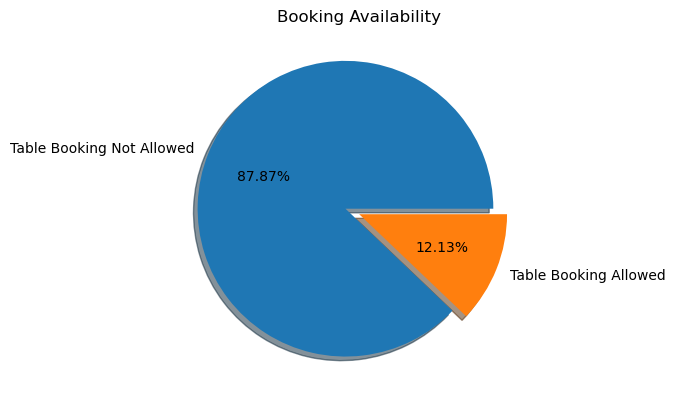

In [49]:
#Graphical representation of above ratio in pie chart
plt.title('Booking Availability')
plt.pie(Booking_table,labels=('Table Booking Not Allowed','Table Booking Allowed'),explode=(0.1,0),shadow=True,
                              autopct='%1.2f%%')
plt.show()

# Above pie chart clearly shows that only 12.13% restaurants allow table booking and majority of 87.87% dont allow

In [50]:
#Percentage of restaurants providing online delivery 
Online_delivery=df.groupby('Has_Online_delivery').Restaurant_ID.count()
Online_delivery

Has_Online_delivery
No     7099
Yes    2451
Name: Restaurant_ID, dtype: int64

In [52]:
print('Percentage of restaurants providing online delivery:',
     round((Online_delivery.Yes/Online_delivery.sum()),4)*100)

Percentage of restaurants providing online delivery: 25.66


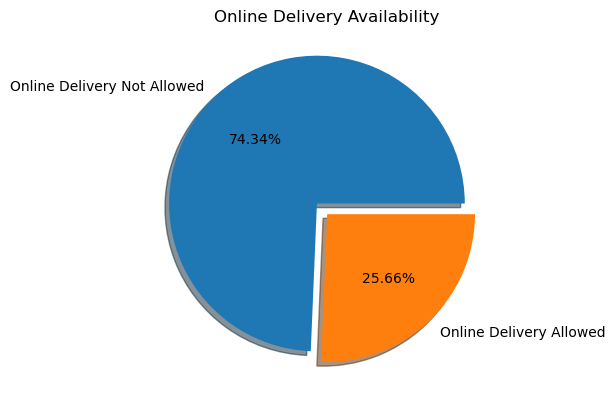

In [58]:
#Geographical respresentation Via pie chart 

plt.title('Online Delivery Availability')
plt.pie(Online_delivery,labels=('Online Delivery Not Allowed','Online Delivery Allowed'),explode=(0.1,0),shadow=True,
       autopct='%1.2f%%')
plt.show()

# The abve calculation and the pie chart shows that 25.66% of restaurants provide online delivery.However , majority of 73.34% do not have this facility

In [60]:
#Difference in number if votes for the restaurants that deliver and the restaurant do not deliver 

Online_delivery_Votes=df.groupby('Has_Online_delivery').Votes.sum()
Online_delivery_Votes

Has_Online_delivery
No     979962
Yes    517914
Name: Votes, dtype: int64

In [67]:
Votes_difference = Online_delivery_Votes.No - Online_delivery_Votes.Yes
print('Difference in number of votes for the resaurants that deliver and resaurants that do not deliver:',
     Votes_difference)

Difference in number of votes for the resaurants that deliver and resaurants that do not deliver: 462048


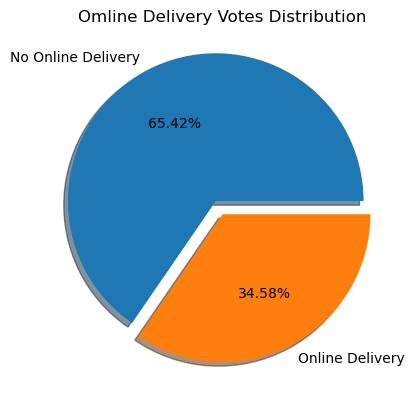

In [69]:
#geography representation via pie chart
plt.title('Omline Delivery Votes Distribution')
plt.pie(Online_delivery_Votes,labels=('No Online Delivery','Online Delivery'),explode=(0.1,0),shadow=True,
       autopct='%1.2f%%')
plt.show()

# It means that 65.42% votes have been given to those restaurants who don't have online delivery and those with online delivery have received voting of 34.58%.  

# It means that restaurants with no online delivery are getting more votes.

In [70]:
#spliting the 'Cuisines' column into multiple columns and renaming the columns

cuisines_split = df['Cuisines'].apply(lambda x: pd.Series(x.split(',')))
cuisines_split.columns=['Cuisines 1','Cuisines 2','Cuisines 3','Cuisines 4','Cuisines 5','Cuisines 6','Cuisines 7','Cuisines 8']
cuisines_split.head()

,Cuisines 1,Cuisines 2,Cuisines 3,Cuisines 4,Cuisines 5,Cuisines 6,Cuisines 7,Cuisines 8
0,Italian,Continental,NaN,NaN,NaN,NaN,NaN,NaN
1,Asian,Indonesian,Western,NaN,NaN,NaN,NaN,NaN
2,Sushi,Japanese,NaN,NaN,NaN,NaN,NaN,NaN
3,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,French,Western,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
Cuisines1_count=pd.DataFrame(cuisines_split["Cuisines 1"].value_counts()).reset_index()
Cuisines1_count=Cuisines1_count.rename(columns={"index":"Cuisines","Cuisines 1":"Counts"})
Cuisines1_count.head(10)

,Cuisines,Counts
0,North Indian,2991
1,Chinese,855
2,Fast Food,672
3,Bakery,621
4,Cafe,617
5,American,278
6,South Indian,262
7,Mithai,246
8,Street Food,236
9,Continental,235


In [74]:
Cuisines2_count=pd.DataFrame(cuisines_split["Cuisines 2"].value_counts()).reset_index()
Cuisines2_count=Cuisines2_count.rename(columns={"index":"Cuisines","Cuisines 2":"Counts"})
Cuisines2_count.head(10)

,Cuisines,Counts
0,Chinese,1156
1,Fast Food,820
2,North Indian,687
3,Mughlai,635
4,Desserts,407
5,Continental,244
6,Italian,240
7,South Indian,219
8,Street Food,216
9,Thai,110


In [75]:
Cuisines3_count=pd.DataFrame(cuisines_split["Cuisines 3"].value_counts()).reset_index()
Cuisines3_count=Cuisines3_count.rename(columns={"index":"Cuisines","Cuisines 3":"Counts"})
Cuisines3_count.head(10)

,Cuisines,Counts
0,Chinese,594
1,Fast Food,385
2,Continental,193
3,North Indian,191
4,Italian,189
5,Mughlai,124
6,South Indian,123
7,Salad,70
8,Asian,64
9,Thai,50


In [76]:
Cuisines4_count=pd.DataFrame(cuisines_split["Cuisines 4"].value_counts()).reset_index()
Cuisines4_count=Cuisines4_count.rename(columns={"index":"Cuisines","Cuisines 4":"Counts"})
Cuisines4_count.head(10)

,Cuisines,Counts
0,Italian,84
1,Chinese,81
2,Fast Food,77
3,Healthy Food,67
4,North Indian,65
5,Street Food,59
6,Continental,50
7,Asian,31
8,Mithai,26
9,South Indian,25


In [77]:
Cuisines5_count=pd.DataFrame(cuisines_split["Cuisines 5"].value_counts()).reset_index()
Cuisines5_count=Cuisines5_count.rename(columns={"index":"Cuisines","Cuisines 5":"Counts"})
Cuisines5_count.head(10)

,Cuisines,Counts
0,Chinese,41
1,Fast Food,30
2,North Indian,23
3,Thai,20
4,Italian,13
5,Mithai,12
6,Continental,11
7,Mediterranean,11
8,Asian,9
9,Bakery,8


In [78]:
Cuisines6_count=pd.DataFrame(cuisines_split["Cuisines 6"].value_counts()).reset_index()
Cuisines6_count=Cuisines6_count.rename(columns={"index":"Cuisines","Cuisines 6":"Counts"})
Cuisines6_count.head(10)

,Cuisines,Counts
0,Mithai,23
1,Beverages,12
2,Lebanese,8
3,Chinese,8
4,Thai,5
5,Tea,4
6,Desserts,4
7,Cafe,4
8,Finger Food,3
9,Italian,3


In [79]:
Cuisines7_count=pd.DataFrame(cuisines_split["Cuisines 7"].value_counts()).reset_index()
Cuisines7_count=Cuisines7_count.rename(columns={"index":"Cuisines","Cuisines 7":"Counts"})
Cuisines7_count.head(10)

,Cuisines,Counts
0,Desserts,24
1,European,2
2,Mediterranean,2
3,Mithai,2
4,American,1
5,Rajasthani,1
6,Asian,1
7,Pizza,1
8,Ice Cream,1
9,Lebanese,1


In [80]:
Cuisines8_count=pd.DataFrame(cuisines_split["Cuisines 8"].value_counts()).reset_index()
Cuisines8_count=Cuisines8_count.rename(columns={"index":"Cuisines","Cuisines 8":"Counts"})
Cuisines8_count.head(10)

,Cuisines,Counts
0,Mithai,8
1,Finger Food,2
2,International,2
3,Mughlai,1
4,Beverages,1


In [81]:
Cuisines_append = Cuisines1_count.append([Cuisines2_count,Cuisines3_count, Cuisines4_count,Cuisines5_count,Cuisines6_count,
                                         Cuisines7_count,Cuisines8_count])
Cuisines_append['Cuisines']=Cuisines_append.Cuisines.str.replace(' ','')
Cuisines_append

C:\Users\sushm\AppData\Local\Temp\ipykernel_9096\2224777856.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Cuisines_append = Cuisines1_count.append([Cuisines2_count,Cuisines3_count, Cuisines4_count,Cuisines5_count,Cuisines6_count,


,Cuisines,Counts
0,NorthIndian,2991
1,Chinese,855
2,FastFood,672
3,Bakery,621
4,Cafe,617
...,...,...
0,Mithai,8
1,FingerFood,2
2,International,2
3,Mughlai,1


In [83]:
Cuisines_group= Cuisines_append.groupby('Cuisines').sum()
Max_Cuisines=Cuisines_group.sort_values(by='Counts',ascending= False)

In [84]:
Max_Cuisines

,Counts
Cuisines,
NorthIndian,3959
Chinese,2735
FastFood,1986
Mughlai,995
Italian,763
...,...
Canadian,1
Mineira,1
SoulFood,1


In [86]:
#top 10 Cuisines served across cities
Top_10_Cuisines=pd.DataFrame(Max_Cuisines.head(10)).reset_index()
Top_10_Cuisines

,Cuisines,Counts
0,NorthIndian,3959
1,Chinese,2735
2,FastFood,1986
3,Mughlai,995
4,Italian,763
5,Bakery,745
6,Continental,735
7,Cafe,703
8,Desserts,653
9,SouthIndian,636


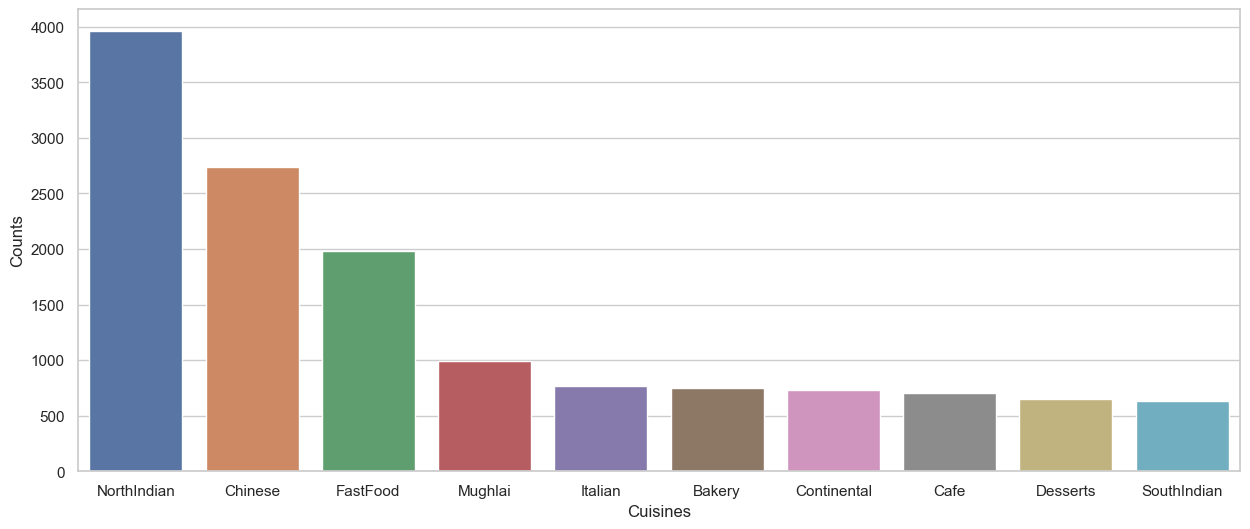

In [88]:
#Bar plot of top 10 Cuisines

sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(15,6))
ax=sns.barplot(x='Cuisines',y='Counts',data=Top_10_Cuisines)

# Above are the top 10 cuisines accross cities, where 'North Indian' Cuisine is on the top, 2nd 'Chinese', and 3rd is 'Fast Food'.

# Therefore, most served cuisine is 'North Indian'.

In [89]:
# Maximum and minimum number of cuisines that a restaurant serves
df2 = pd.DataFrame(df, columns=['Restaurant_Name','City','Cuisines'])
df2

,Restaurant_Name,City,Cuisines
0,Skye,Jakarta,"Italian, Continental"
1,Satoo - Hotel Shangri-La,Jakarta,"Asian, Indonesian, Western"
2,Sushi Masa,Jakarta,"Sushi, Japanese"
3,3 Wise Monkeys,Jakarta,Japanese
4,Avec Moi Restaurant and Bar,Jakarta,"French, Western"
...,...,...,...
9545,BMG - All Day Dining,Dehradun,"Chinese, North Indian, Fast Food"
9546,Atmosphere Grill Cafe Sheesha,Kanpur,"Indian, Chinese, Continental"
9547,UrbanCrave,Kanpur,"Cafe, Continental, Desserts, Ice Cream, Italia..."
9548,Deena Chat Bhandar,Varanasi,Street Food


In [92]:
CuisineCount_by_res=pd.DataFrame(df2.groupby('Restaurant_Name').Cuisines.count()).reset_index()
CuisineCount_by_res.sort_values(by='Cuisines',ascending= False)

,Restaurant_Name,Cuisines
1098,Cafe Coffee Day,83
2098,Domino's Pizza,79
6105,Subway,63
2716,Green Chick Chop,51
4076,McDonald's,48
...,...,...
2617,Ghungroo Club & Bar - By Gautam Gambhir,1
2616,Ghar Ki Handi,1
2615,Ghar Ka Swad,1
2613,Ghar Bistro Cafe,1


# The Maximum numbers of cuisines serves by a restaurant is 83 by 'Cafe Coffee Day' and the least number of cuisines serves by a restaurant is 1.

# There are many such restaurants with only 1 cuisine.

In [93]:
# Currency wise distribution of cost

Currency_dis = pd.DataFrame(df.groupby('Currency').Average_Cost_for_two.count()).reset_index()
Currency_dis.sort_values(by='Average_Cost_for_two',ascending = False)

,Currency,Average_Cost_for_two
4,Indian Rupees(Rs.),8651
2,Dollar($),482
7,Pounds(å£),80
1,Brazilian Real(R$),60
3,Emirati Diram(AED),60
9,Rand(R),60
6,NewZealand($),40
11,Turkish Lira(TL),34
0,Botswana Pula(P),22
5,Indonesian Rupiah(IDR),21


In [95]:
#distribution cost accross the restaurants
Cost_per_restaurants = pd.DataFrame(df.groupby('Restaurant_Name').Average_Cost_for_two.sum()).reset_index()
Cost_per_restaurants.sort_values(by ='Average_Cost_for_two', ascending = False)

,Restaurant_Name,Average_Cost_for_two
5897,Skye,800000
5594,Satoo - Hotel Shangri-La,800000
6262,Talaga Sampireun,600000
6170,Sushi Masa,500000
41,3 Wise Monkeys,450000
...,...,...
7096,UrbanCrave,0
486,Atmosphere Grill Cafe Sheesha,0
1746,Cookie Shoppe,0
6691,The Latitude - Radisson Blu,0


In [98]:
#restaurant wise distribution of cost - by Currencies

df3= pd.DataFrame(df.groupby(['Currency','Restaurant_Name']).agg(Count=('Average_Cost_for_two',sum))).reset_index()
df3.sort_values(by='Count', ascending = False)

,Currency,Restaurant_Name,Count
7219,Indonesian Rupiah(IDR),Satoo - Hotel Shangri-La,800000
7220,Indonesian Rupiah(IDR),Skye,800000
7222,Indonesian Rupiah(IDR),Talaga Sampireun,600000
7221,Indonesian Rupiah(IDR),Sushi Masa,500000
7208,Indonesian Rupiah(IDR),3 Wise Monkeys,450000
...,...,...,...
418,Dollar($),Royal Hotel,0
6558,Indian Rupees(Rs.),The Latitude - Radisson Blu,0
214,Dollar($),El Vaquero Mexican Restaurant,0
6351,Indian Rupees(Rs.),The BrewMaster,0


In [100]:
df3.groupby(['Currency'],sort=False) ['Count'].max()

Currency
Botswana Pula(P)            6000
Brazilian Real(R$)           460
Dollar($)                    500
Emirati Diram(AED)           750
Indian Rupees(Rs.)         55300
Indonesian Rupiah(IDR)    800000
NewZealand($)                200
Pounds(å£)                   230
Qatari Rial(QR)              550
Rand(R)                     3210
Sri Lankan Rupee(LKR)       4500
Turkish Lira(TL)             400
Name: Count, dtype: int64

In [104]:
#Currency wise highest cost accross restaurants

Max_cost= df3.groupby('Currency').apply(lambda group: group[group.Count == group.Count.max()]).reset_index(drop=True)
Max_cost.sort_values(by='Count', ascending = False)

,Currency,Restaurant_Name,Count
5,Indonesian Rupiah(IDR),Satoo - Hotel Shangri-La,800000
6,Indonesian Rupiah(IDR),Skye,800000
4,Indian Rupees(Rs.),Domino's Pizza,55300
0,Botswana Pula(P),Spiral - Sofitel Philippine Plaza Manila,6000
11,Sri Lankan Rupee(LKR),The Manhattan Fish Market,4500
10,Rand(R),Restaurant Mosaic @ The Orient,3210
3,Emirati Diram(AED),Applebee's,750
9,Qatari Rial(QR),Vine - The St. Regis,550
2,Dollar($),Restaurant Andre,500
1,Brazilian Real(R$),Coco Bambu,460


# The above table shows the currency wise highest cost accross different restaurants. For example 'Skye' and 'Satoo - Hotel

# Shangri-La' have the maximum cost with IDR currency, 'Domino's Pizza' has maximum cost with 'Indian Rupees' currency etc.

In [109]:
# Rating distribution count on the scale of 0-5, where 5 being the best
Rating_count=pd.DataFrame(df.groupby('Aggregate_rating').agg(count=('Restaurant_Name','count'))).reset_index()
Rating_count.sort_values(by='Aggregate_rating', ascending= False)

,Aggregate_rating,count
32,4.9,61
31,4.8,25
30,4.7,42
29,4.6,78
28,4.5,95
27,4.4,144
26,4.3,174
25,4.2,221
24,4.1,273
23,4.0,266


# The above table shows that 61 restaurants have the highest & best ratings. On the other hand a big number of restaurants (2148) do not even have any ratings.

In [111]:
Country_Rating_count= pd.DataFrame(df.groupby(['Country','Aggregate_rating']).agg(Count =('Restaurant_Name','count'))).reset_index()
Country_Rating_count.sort_values(by='Aggregate_rating', ascending=False)

,Country,Aggregate_rating,Count
221,United States,4.9,14
92,New Zealand,4.9,2
139,South Africa,4.9,3
151,Sri Lanka,4.9,1
32,Brazil,4.9,3
...,...,...,...
38,India,1.8,1
200,United States,0.0,3
12,Brazil,0.0,5
180,United Kingdom,0.0,1


In [112]:
#Countrywise _best rated restaurants
Country_wise_top_rating=pd.DataFrame(Country_Rating_count[Country_Rating_count.Aggregate_rating>=4.9]).reset_index()
Country_wise_top_rating.sort_values(by='Count', ascending=False)

,index,Country,Aggregate_rating,Count
1,69,India,4.9,19
11,221,United States,4.9,14
2,79,Indonesia,4.9,4
9,179,UAE,4.9,4
10,199,United Kingdom,4.9,4
0,32,Brazil,4.9,3
4,101,Phillipines,4.9,3
6,139,South Africa,4.9,3
8,163,Turkey,4.9,3
3,92,New Zealand,4.9,2


# The above tell us that the maximum number of best rated restaurants are in India, then United States. Out of 15, 12 Countries have at least 1 or above best rated restaurant/s.

In [115]:
#Rating distribution basis on rating type
RatingType_count=pd.DataFrame(df.groupby('Rating_text').agg(count=('Restaurant_Name','count'))).reset_index()
RatingType_count

,Rating_text,count
0,Average,3737
1,Excellent,301
2,Good,2100
3,Not rated,2148
4,Poor,186
5,Very Good,1078


# It states that accross countries and cities only 301 restaurants have 'Excellent' rating.

In [117]:
Country_RatingType_count=pd.DataFrame(df.groupby(['Country','Rating_text']).agg(Count=('Restaurant_Name','count'))).reset_index()
Country_RatingType_count

,Country,Rating_text,Count
0,Australia,Average,4
1,Australia,Excellent,1
2,Australia,Good,13
3,Australia,Poor,1
4,Australia,Very Good,5
...,...,...,...
61,United States,Excellent,68
62,United States,Good,159
63,United States,Not rated,3
64,United States,Poor,2


In [123]:
Country_wise_ratingType=pd.DataFrame(Country_RatingType_count[Country_RatingType_count.Rating_text == 'Excellent']).reset_index()
Country_wise_ratingType.sort_values(by='Count', ascending= False)

,index,Country,Rating_text,Count
2,14,India,Excellent,116
12,61,United States,Excellent,68
11,56,United Kingdom,Excellent,23
10,51,UAE,Excellent,18
1,6,Brazil,Excellent,16
4,23,New Zealand,Excellent,12
5,27,Phillipines,Excellent,12
7,38,South Africa,Excellent,12
9,47,Turkey,Excellent,10
3,20,Indonesia,Excellent,7


# After disbuting the rating by its type, its clear that India has maximum numbers of restaurants with 'Excellent' rating.

In [133]:
Rating_corr=df[['Restaurant_ID','Restaurant_Name','Country','City','Aggregate_rating','Average_Cost_for_two','Votes',
               'Price_range','Has_Table_booking','Has_Online_delivery']]

In [135]:
Rating_corr

,Restaurant_ID,Restaurant_Name,Country,City,Aggregate_rating,Average_Cost_for_two,Votes,Price_range,Has_Table_booking,Has_Online_delivery
0,7402935,Skye,Indonesia,Jakarta,4.1,800000,1498,3,No,No
1,7410290,Satoo - Hotel Shangri-La,Indonesia,Jakarta,4.6,800000,873,3,No,No
2,7420899,Sushi Masa,Indonesia,Jakarta,4.9,500000,605,3,No,No
3,7421967,3 Wise Monkeys,Indonesia,Jakarta,4.2,450000,395,3,No,No
4,7422489,Avec Moi Restaurant and Bar,Indonesia,Jakarta,4.3,350000,243,3,No,No
...,...,...,...,...,...,...,...,...,...,...
9545,18279289,BMG - All Day Dining,India,Dehradun,4.3,0,63,1,No,No
9546,2300497,Atmosphere Grill Cafe Sheesha,India,Kanpur,3.6,0,34,1,No,No
9547,18312106,UrbanCrave,India,Kanpur,3.9,0,127,1,No,No
9548,3900245,Deena Chat Bhandar,India,Varanasi,3.8,0,78,1,No,No


In [144]:
dummy = ['Has_Table_booking','Has_Online_delivery'] # 0 indicates 'NO' and 1 indicates 'YES'
Rating_corr = pd.get_dummies(Rating_corr,columns=dummy,drop_first=True)
Rating_corr = Rating_corr.merge(CuisineCount_by_res,left_on='Restaurant_Name',right_on='Restaurant_Name',how='left')
Rating_corr.head()

,Restaurant_ID,Restaurant_Name,Country,City,Aggregate_rating,Average_Cost_for_two,Votes,Price_range,Has_Table_booking_Yes,Has_Online_delivery_Yes,Cuisines
0,7402935,Skye,Indonesia,Jakarta,4.1,800000,1498,3,0,0,1
1,7410290,Satoo - Hotel Shangri-La,Indonesia,Jakarta,4.6,800000,873,3,0,0,1
2,7420899,Sushi Masa,Indonesia,Jakarta,4.9,500000,605,3,0,0,1
3,7421967,3 Wise Monkeys,Indonesia,Jakarta,4.2,450000,395,3,0,0,1
4,7422489,Avec Moi Restaurant and Bar,Indonesia,Jakarta,4.3,350000,243,3,0,0,1


,Average_Cost_for_two,Aggregate_rating
Average_Cost_for_two,1.000000,0.051797
Aggregate_rating,0.051797,1.000000


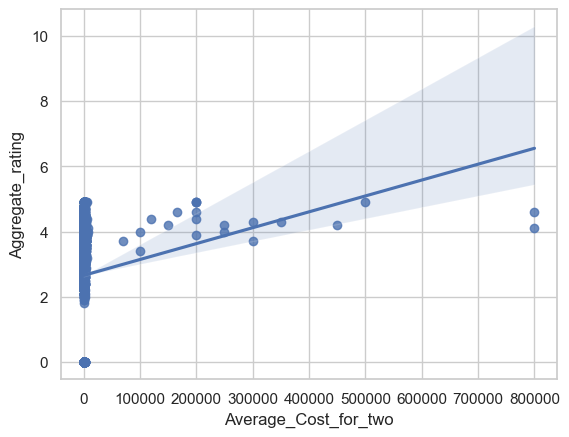

In [146]:
#Correlation between "Rating" and "Average cost for two"
sns.regplot(x='Average_Cost_for_two',y='Aggregate_rating',data=Rating_corr)
Rating_corr[["Average_Cost_for_two","Aggregate_rating"]].corr()

# The above charts shows a weak positive correlation between Average cost for two and Rating of the restaurants

,Has_Table_booking_Yes,Aggregate_rating
Has_Table_booking_Yes,1.000000,0.190045
Aggregate_rating,0.190045,1.000000


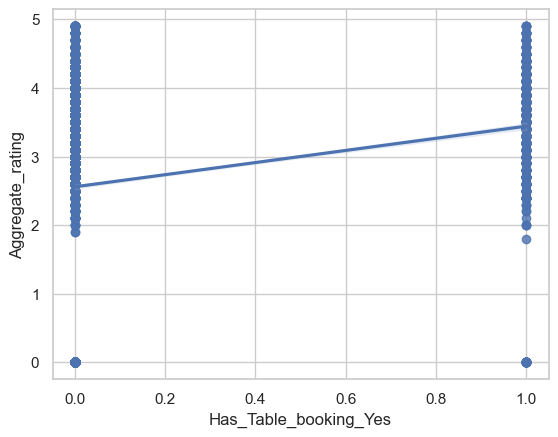

In [148]:
#Correalation between "Rating" and "Has Table Booking" - 0 indicates 'NO' and 1 indicates 'Yes'
sns.regplot(x='Has_Table_booking_Yes', y='Aggregate_rating',data=Rating_corr)
Rating_corr[['Has_Table_booking_Yes','Aggregate_rating']].corr()

# There is a good positive correlation between table booking option and Rating. This could be one of the basis for good rating

,Has_Online_delivery_Yes,Aggregate_rating
Has_Online_delivery_Yes,1.000000,0.225772
Aggregate_rating,0.225772,1.000000


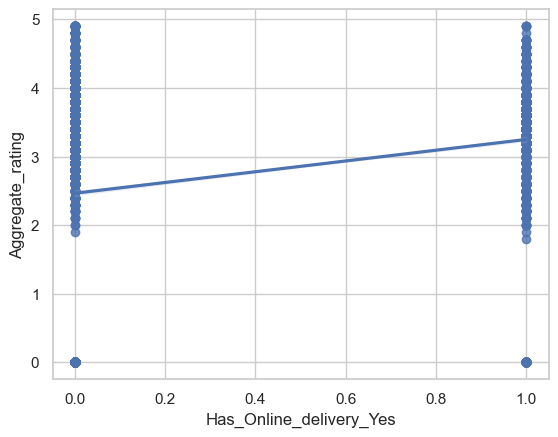

In [150]:
#Correalation between "Rating" and "Has Online Delivery" 0 indicates No , 1 indicates 'Yes'
sns.regplot(x='Has_Online_delivery_Yes', y= 'Aggregate_rating',data=Rating_corr)
Rating_corr[['Has_Online_delivery_Yes','Aggregate_rating']].corr()

# There is a good positive correlation between online delivry option and Rating. This could be another big factor for giving a good rating to a restaurant

,Price_range,Aggregate_rating
Price_range,1.000000,0.437874
Aggregate_rating,0.437874,1.000000


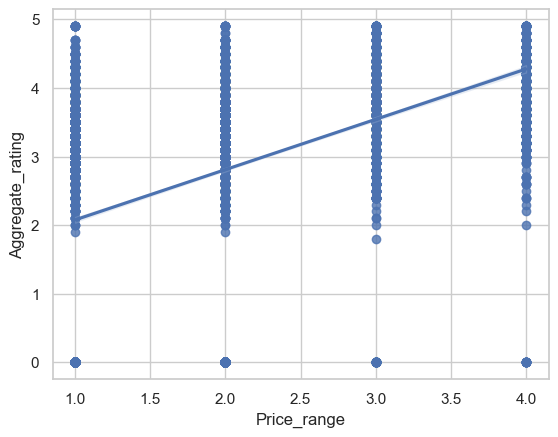

In [152]:
##Correalation between "Rating" and "Price_range" 0 indicates No , 1 indicates 'Yes'
sns.regplot(x='Price_range',y='Aggregate_rating',data=Rating_corr)
Rating_corr[['Price_range','Aggregate_rating']].corr()


# Price range has very positive correlation with rating, as with increasing price range rating also gets better. This is clearly a major factor for deciding the rating.

,Votes,Aggregate_rating
Votes,1.000000,0.313598
Aggregate_rating,0.313598,1.000000


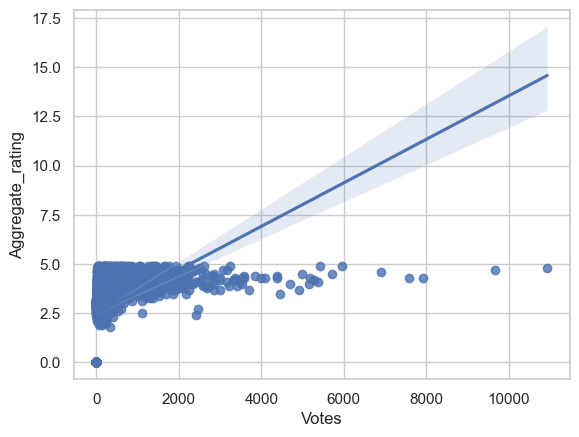

In [153]:
##Correalation between "Rating" and "Votes" 0 indicates No , 1 indicates 'Yes'
sns.regplot(x='Votes',y='Aggregate_rating',data=Rating_corr)
Rating_corr[['Votes','Aggregate_rating']].corr()

# Similar to price, Votes also have a very positive correlation with rating, as with increasing price range rating also gets better.

# This also a major factor for deciding the rating.
 

,Cuisines,Aggregate_rating
Cuisines,1.000000,0.021097
Aggregate_rating,0.021097,1.000000


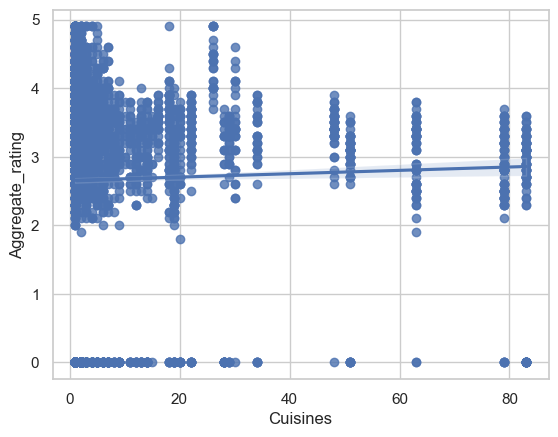

In [155]:
##Correalation between "Rating" and "Cuisines"

sns.regplot(x='Cuisines', y='Aggregate_rating',data=Rating_corr)
Rating_corr[['Cuisines','Aggregate_rating']].corr()


# Number of Cuisines provided by a restaurant is worst correlated to Rating. There is very minimal relation. Hence this cannot be the deciding factor for Rating.

In [157]:
df.to_excel('C:/Users/sushm/OneDrive/Desktop/Capstone project/restaurants.xlsx',index=False)

In [165]:
with pd.ExcelWriter('C:/Users/sushm/OneDrive/Desktop/Capstone project/file.xlsx')as writer:
    df.to_excel(writer, sheet_name = 'Zomato')
    Booking_table.to_excel(writer,sheet_name='Cuisines')

In [ ]:
Tableau Dashboard Link 

https://public.tableau.com/app/profile/sushma.melugiri/viz/Capstoneproject-IdentifyingandRecommendingBestRestaurants/Dashboard1
    
    